In [1]:
import pytimber as pt
import matplotlib.pyplot as plt
from datetime import datetime, timezone, timedelta

import xobjects as xo
import xtrack as xt
import xpart as xp
import xcoll as xc

import pandas as pd
import numpy as np
import scipy.optimize as opt
import scipy.optimize as opt
from scipy.special import erf
from scipy.stats import norm

from matplotlib.ticker import FixedLocator
import matplotlib


#is_swan = False
#if is_swan == False:
#    from nxcals.spark_session_builder import get_or_create
#    from nxcals.api.extraction.data.builders import DataQuery
#    spark = get_or_create("My_APP")

In [2]:
def datestring_to_timestamp_utc(date_string):
    # Parse the date string into a datetime object
    date_obj = datetime.strptime(date_string, '%Y-%m-%d %H:%M:%S') - timedelta(hours=2)
    
    # Convert the datetime object to UTC timezone if it's not already in UTC
    if date_obj.tzinfo is None or date_obj.tzinfo.utcoffset(date_obj) is None:
        date_obj = date_obj.replace(tzinfo=timezone.utc)
    else:
        date_obj = date_obj.astimezone(timezone.utc)
    
    # Extract the timestamp in seconds
    timestamp_utc = date_obj.timestamp()
    
    return timestamp_utc


def utc_timestamp_to_date_string(timestamp):
    # Convert the timestamp to a datetime object in UTC
    utc_datetime = datetime.fromtimestamp(timestamp, tz=timezone.utc)
    
    # Format the datetime object to a string
    date_string = utc_datetime.strftime('%Y-%m-%d %H:%M:%S')
    
    return date_string

In [3]:
lbd = pt.LoggingDB(source='nxcals', spark_session=spark)

In [4]:
ti = '2025-05-13 22:55:40'
tf = '2025-05-13 23:06:40'

#var = 'BLMTI.05R7.B2I10_TCPCH.A5R7.B2:LOSS_RS09'
var = "hitMapTFT"

In [5]:
fromTimber = lbd.get(var, ti, tf)

25/06/17 15:26:24 INFO ContextHandler: Started o.s.j.s.ServletContextHandler@227b7dea{/SQL,null,AVAILABLE,@Spark}
25/06/17 15:26:24 INFO ContextHandler: Started o.s.j.s.ServletContextHandler@313ae8ff{/SQL/json,null,AVAILABLE,@Spark}
25/06/17 15:26:24 INFO ContextHandler: Started o.s.j.s.ServletContextHandler@4db5a6ce{/SQL/execution,null,AVAILABLE,@Spark}
25/06/17 15:26:24 INFO ContextHandler: Started o.s.j.s.ServletContextHandler@45049b27{/SQL/execution/json,null,AVAILABLE,@Spark}
25/06/17 15:26:24 INFO ContextHandler: Started o.s.j.s.ServletContextHandler@76d633bf{/static/sql,null,AVAILABLE,@Spark}
25/06/17 15:26:48 ERROR YarnScheduler: Lost executor 1 on ithdp-nxcals7005.cern.ch: Container from a bad node: container_e93_1740382629255_140974_01_000002 on host: ithdp-nxcals7005.cern.ch. Exit status: 143. Diagnostics: [2025-06-17 15:26:48.246]Container killed on request. Exit code is 143
[2025-06-17 15:26:48.277]Container exited with a non-zero exit code 143. 
[2025-06-17 15:26:48.277]K

/cvmfs/sft.cern.ch/lcg/views/LCG_106a_nxcals_pro/x86_64-el9-gcc13-opt/python/pyspark/sql/pandas/conversion.py:198: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true, but has reached the error below and can not continue. Note that 'spark.sql.execution.arrow.pyspark.fallback.enabled' does not have an effect on failures in the middle of computation.
  An error occurred while calling o149.getResult.
: org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.SparkThreadUtils$.awaitResult(SparkThreadUtils.scala:56)
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:310)
	at org.apache.spark.security.SocketAuthServer.getResult(SocketAuthServer.scala:98)
	at org.apache.spark.security.SocketAuthServer.getResult(SocketAuthServer.scala:94)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at java.base/jdk.internal.reflect.NativeMethodAccessorI

Py4JJavaError: An error occurred while calling o149.getResult.
: org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.SparkThreadUtils$.awaitResult(SparkThreadUtils.scala:56)
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:310)
	at org.apache.spark.security.SocketAuthServer.getResult(SocketAuthServer.scala:98)
	at org.apache.spark.security.SocketAuthServer.getResult(SocketAuthServer.scala:94)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.base/java.lang.reflect.Method.invoke(Method.java:566)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.base/java.lang.Thread.run(Thread.java:829)
Caused by: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 1.0 failed 4 times, most recent failure: Lost task 0.3 in stage 1.0 (TID 5) (ithdp-nxcals6012.cern.ch executor 4): ExecutorLostFailure (executor 4 exited caused by one of the running tasks) Reason: Container from a bad node: container_e93_1740382629255_140974_01_000005 on host: ithdp-nxcals6012.cern.ch. Exit status: 143. Diagnostics: [2025-06-17 15:28:28.222]Container killed on request. Exit code is 143
[2025-06-17 15:28:28.243]Container exited with a non-zero exit code 143. 
[2025-06-17 15:28:28.243]Killed by external signal
.
Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2856)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2792)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2791)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:2791)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:1247)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:1247)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:1247)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:3060)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2994)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2983)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:989)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2393)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2414)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2433)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2458)
	at org.apache.spark.rdd.RDD.$anonfun$collect$1(RDD.scala:1049)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:410)
	at org.apache.spark.rdd.RDD.collect(RDD.scala:1048)
	at org.apache.spark.RangePartitioner$.sketch(Partitioner.scala:320)
	at org.apache.spark.RangePartitioner.<init>(Partitioner.scala:187)
	at org.apache.spark.sql.execution.exchange.ShuffleExchangeExec$.prepareShuffleDependency(ShuffleExchangeExec.scala:296)
	at org.apache.spark.sql.execution.exchange.ShuffleExchangeExec.shuffleDependency$lzycompute(ShuffleExchangeExec.scala:179)
	at org.apache.spark.sql.execution.exchange.ShuffleExchangeExec.shuffleDependency(ShuffleExchangeExec.scala:173)
	at org.apache.spark.sql.execution.exchange.ShuffleExchangeExec.mapOutputStatisticsFuture$lzycompute(ShuffleExchangeExec.scala:149)
	at org.apache.spark.sql.execution.exchange.ShuffleExchangeExec.mapOutputStatisticsFuture(ShuffleExchangeExec.scala:145)
	at org.apache.spark.sql.execution.exchange.ShuffleExchangeLike.$anonfun$submitShuffleJob$1(ShuffleExchangeExec.scala:73)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$executeQuery$1(SparkPlan.scala:246)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.sql.execution.SparkPlan.executeQuery(SparkPlan.scala:243)
	at org.apache.spark.sql.execution.exchange.ShuffleExchangeLike.submitShuffleJob(ShuffleExchangeExec.scala:73)
	at org.apache.spark.sql.execution.exchange.ShuffleExchangeLike.submitShuffleJob$(ShuffleExchangeExec.scala:72)
	at org.apache.spark.sql.execution.exchange.ShuffleExchangeExec.submitShuffleJob(ShuffleExchangeExec.scala:120)
	at org.apache.spark.sql.execution.adaptive.ShuffleQueryStageExec.shuffleFuture$lzycompute(QueryStageExec.scala:187)
	at org.apache.spark.sql.execution.adaptive.ShuffleQueryStageExec.shuffleFuture(QueryStageExec.scala:187)
	at org.apache.spark.sql.execution.adaptive.ShuffleQueryStageExec.doMaterialize(QueryStageExec.scala:189)
	at org.apache.spark.sql.execution.adaptive.QueryStageExec.materialize(QueryStageExec.scala:61)
	at org.apache.spark.sql.execution.adaptive.AdaptiveSparkPlanExec.$anonfun$getFinalPhysicalPlan$5(AdaptiveSparkPlanExec.scala:302)
	at org.apache.spark.sql.execution.adaptive.AdaptiveSparkPlanExec.$anonfun$getFinalPhysicalPlan$5$adapted(AdaptiveSparkPlanExec.scala:300)
	at scala.collection.Iterator.foreach(Iterator.scala:943)
	at scala.collection.Iterator.foreach$(Iterator.scala:943)
	at scala.collection.AbstractIterator.foreach(Iterator.scala:1431)
	at scala.collection.IterableLike.foreach(IterableLike.scala:74)
	at scala.collection.IterableLike.foreach$(IterableLike.scala:73)
	at scala.collection.AbstractIterable.foreach(Iterable.scala:56)
	at org.apache.spark.sql.execution.adaptive.AdaptiveSparkPlanExec.$anonfun$getFinalPhysicalPlan$1(AdaptiveSparkPlanExec.scala:300)
	at org.apache.spark.sql.SparkSession.withActive(SparkSession.scala:900)
	at org.apache.spark.sql.execution.adaptive.AdaptiveSparkPlanExec.getFinalPhysicalPlan(AdaptiveSparkPlanExec.scala:272)
	at org.apache.spark.sql.execution.adaptive.AdaptiveSparkPlanExec.withFinalPlanUpdate(AdaptiveSparkPlanExec.scala:417)
	at org.apache.spark.sql.execution.adaptive.AdaptiveSparkPlanExec.doExecute(AdaptiveSparkPlanExec.scala:402)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$execute$1(SparkPlan.scala:195)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$executeQuery$1(SparkPlan.scala:246)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.sql.execution.SparkPlan.executeQuery(SparkPlan.scala:243)
	at org.apache.spark.sql.execution.SparkPlan.execute(SparkPlan.scala:191)
	at org.apache.spark.sql.Dataset.toArrowBatchRdd(Dataset.scala:4377)
	at org.apache.spark.sql.Dataset.$anonfun$collectAsArrowToPython$5(Dataset.scala:4262)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally(SparkErrorUtils.scala:64)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally$(SparkErrorUtils.scala:61)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:94)
	at org.apache.spark.sql.Dataset.$anonfun$collectAsArrowToPython$2(Dataset.scala:4267)
	at org.apache.spark.sql.Dataset.$anonfun$collectAsArrowToPython$2$adapted(Dataset.scala:4243)
	at org.apache.spark.sql.Dataset.$anonfun$withAction$2(Dataset.scala:4323)
	at org.apache.spark.sql.execution.QueryExecution$.withInternalError(QueryExecution.scala:546)
	at org.apache.spark.sql.Dataset.$anonfun$withAction$1(Dataset.scala:4321)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$6(SQLExecution.scala:125)
	at org.apache.spark.sql.execution.SQLExecution$.withSQLConfPropagated(SQLExecution.scala:201)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$1(SQLExecution.scala:108)
	at org.apache.spark.sql.SparkSession.withActive(SparkSession.scala:900)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:66)
	at org.apache.spark.sql.Dataset.withAction(Dataset.scala:4321)
	at org.apache.spark.sql.Dataset.$anonfun$collectAsArrowToPython$1(Dataset.scala:4243)
	at org.apache.spark.sql.Dataset.$anonfun$collectAsArrowToPython$1$adapted(Dataset.scala:4242)
	at org.apache.spark.security.SocketAuthServer$.$anonfun$serveToStream$2(SocketAuthServer.scala:140)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally(SparkErrorUtils.scala:64)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally$(SparkErrorUtils.scala:61)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:94)
	at org.apache.spark.security.SocketAuthServer$.$anonfun$serveToStream$1(SocketAuthServer.scala:142)
	at org.apache.spark.security.SocketAuthServer$.$anonfun$serveToStream$1$adapted(SocketAuthServer.scala:137)
	at org.apache.spark.security.SocketFuncServer.handleConnection(SocketAuthServer.scala:114)
	at org.apache.spark.security.SocketFuncServer.handleConnection(SocketAuthServer.scala:108)
	at org.apache.spark.security.SocketAuthServer$$anon$1.$anonfun$run$4(SocketAuthServer.scala:69)
	at scala.util.Try$.apply(Try.scala:213)
	at org.apache.spark.security.SocketAuthServer$$anon$1.run(SocketAuthServer.scala:69)


In [6]:
fromTimber

NameError: name 'fromTimber' is not defined

In [5]:
len(fromTimber['hitMapTFT'][0])

27

In [23]:
test = fromTimber['hitMapTFT'][1][8]
test.shape

(1500, 1500)

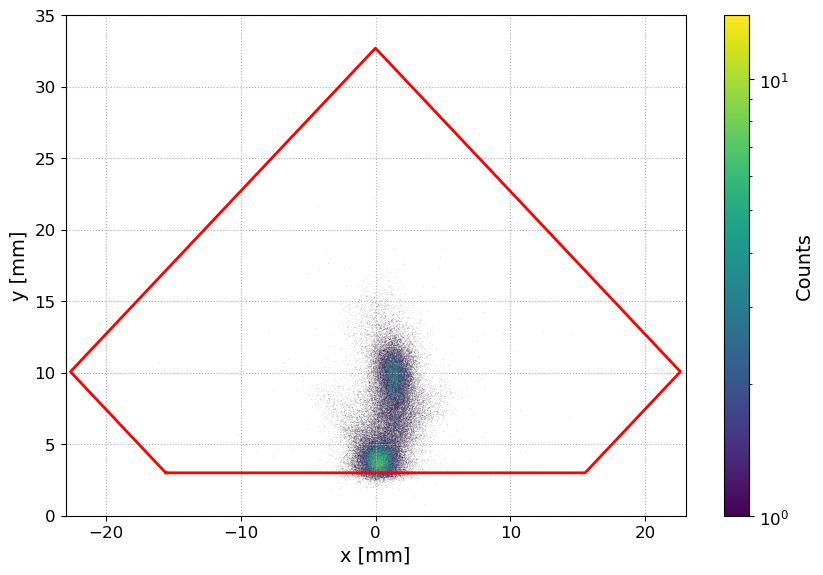

In [33]:
def get_pentagonal(y_lim = 0.003):
    angles = [180-135, 90, 90, 90,135] 
    side_lengths = [31.1e-3, 10e-3, 32e-3, 32e-3, 10e-3]  
    angles = np.radians(angles)

    ALFA_x = [0]
    ALFA_y = [0]
    for i in range(len(side_lengths)):
        angle_sum = np.sum(angles[:i])
        ALFA_x.append(ALFA_x[-1] + side_lengths[i] * np.cos(angle_sum))
        ALFA_y.append(ALFA_y[-1] + side_lengths[i] * np.sin(angle_sum))
    ALFA_x.append(ALFA_x[0])
    ALFA_y.append(ALFA_y[0])

    ALFA_x = [i -side_lengths[0]/2 for i in ALFA_x]
    ALFA_y = [i + y_lim for i in ALFA_y]

    return np.array(ALFA_x), np.array(ALFA_y)

fig, ax = plt.subplots(figsize=(10,6.5))
xlim = (-23.0, 23.0)
ylim = (0.0, 35.0)
ALFA_x, ALFA_y = get_pentagonal()
ax.plot(ALFA_x*1e3, ALFA_y*1e3, color='r', lw=2)
cmap = plt.cm.viridis.copy()  
cmap.set_under('white')
norm = matplotlib.colors.LogNorm()
plt.imshow(test, origin='lower', cmap=cmap, norm = norm,  extent=[xlim[0], xlim[1], ylim[0], ylim[1]], aspect='auto')  
cbar = plt.colorbar(ax=ax)  
cbar.ax.tick_params(labelsize=12)  
cbar.set_label(label='Counts', fontsize=14)  
ax.set_xlabel('x [mm]', fontsize=14)
ax.set_ylabel('y [mm]', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.grid(linestyle=":")

In [15]:
# Assuming test is your 2D array
ny, nx = test.shape

# Calculate bin sizes
dx = (xlim[1] - xlim[0]) / nx
dy = (ylim[1] - ylim[0]) / ny

print(f"Bin size in x direction: {dx} mm")
print(f"Bin size in y direction: {dy} mm")

Bin size in x direction: 0.030666666666666665 mm
Bin size in y direction: 0.023333333333333334 mm


In [16]:
nx

1500

In [7]:
ti = '2025-05-15 18:21:00'
tf = '2025-05-15 18:22:00'

#var = 'BLMTI.05R7.B2I10_TCPCH.A5R7.B2:LOSS_RS09'
var = "hitMapTFT"

In [8]:
fromTimber = lbd.get(var, ti, tf)

25/06/17 15:42:38 ERROR YarnScheduler: Lost executor 5 on ithdp-nxcals6011.cern.ch: Container from a bad node: container_e93_1740382629255_140974_01_000006 on host: ithdp-nxcals6011.cern.ch. Exit status: 143. Diagnostics: [2025-06-17 15:42:38.310]Container killed on request. Exit code is 143
[2025-06-17 15:42:38.331]Container exited with a non-zero exit code 143. 
[2025-06-17 15:42:38.331]Killed by external signal
.
25/06/17 15:43:13 ERROR YarnScheduler: Lost executor 6 on ithdp-nxcals7004.cern.ch: Container from a bad node: container_e93_1740382629255_140974_01_000007 on host: ithdp-nxcals7004.cern.ch. Exit status: 143. Diagnostics: [2025-06-17 15:43:13.167]Container killed on request. Exit code is 143
[2025-06-17 15:43:13.188]Container exited with a non-zero exit code 143. 
[2025-06-17 15:43:13.188]Killed by external signal
.
25/06/17 15:43:48 ERROR YarnScheduler: Lost executor 7 on ithdp-nxcals6011.cern.ch: Container from a bad node: container_e93_1740382629255_140974_01_000008 on h

/cvmfs/sft.cern.ch/lcg/views/LCG_106a_nxcals_pro/x86_64-el9-gcc13-opt/python/pyspark/sql/pandas/conversion.py:198: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true, but has reached the error below and can not continue. Note that 'spark.sql.execution.arrow.pyspark.fallback.enabled' does not have an effect on failures in the middle of computation.
  An error occurred while calling o206.getResult.
: org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.SparkThreadUtils$.awaitResult(SparkThreadUtils.scala:56)
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:310)
	at org.apache.spark.security.SocketAuthServer.getResult(SocketAuthServer.scala:98)
	at org.apache.spark.security.SocketAuthServer.getResult(SocketAuthServer.scala:94)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at java.base/jdk.internal.reflect.NativeMethodAccessorI

Py4JJavaError: An error occurred while calling o206.getResult.
: org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.SparkThreadUtils$.awaitResult(SparkThreadUtils.scala:56)
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:310)
	at org.apache.spark.security.SocketAuthServer.getResult(SocketAuthServer.scala:98)
	at org.apache.spark.security.SocketAuthServer.getResult(SocketAuthServer.scala:94)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.base/java.lang.reflect.Method.invoke(Method.java:566)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.base/java.lang.Thread.run(Thread.java:829)
Caused by: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 3.0 failed 4 times, most recent failure: Lost task 0.3 in stage 3.0 (TID 10) (ithdp-nxcals6011.cern.ch executor 8): ExecutorLostFailure (executor 8 exited caused by one of the running tasks) Reason: Container from a bad node: container_e93_1740382629255_140974_01_000009 on host: ithdp-nxcals6011.cern.ch. Exit status: 143. Diagnostics: [2025-06-17 15:44:19.014]Container killed on request. Exit code is 143
[2025-06-17 15:44:19.034]Container exited with a non-zero exit code 143. 
[2025-06-17 15:44:19.035]Killed by external signal
.
Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2856)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2792)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2791)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:2791)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:1247)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:1247)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:1247)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:3060)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2994)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2983)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:989)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2393)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2414)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2433)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2458)
	at org.apache.spark.rdd.RDD.$anonfun$collect$1(RDD.scala:1049)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:410)
	at org.apache.spark.rdd.RDD.collect(RDD.scala:1048)
	at org.apache.spark.RangePartitioner$.sketch(Partitioner.scala:320)
	at org.apache.spark.RangePartitioner.<init>(Partitioner.scala:187)
	at org.apache.spark.sql.execution.exchange.ShuffleExchangeExec$.prepareShuffleDependency(ShuffleExchangeExec.scala:296)
	at org.apache.spark.sql.execution.exchange.ShuffleExchangeExec.shuffleDependency$lzycompute(ShuffleExchangeExec.scala:179)
	at org.apache.spark.sql.execution.exchange.ShuffleExchangeExec.shuffleDependency(ShuffleExchangeExec.scala:173)
	at org.apache.spark.sql.execution.exchange.ShuffleExchangeExec.mapOutputStatisticsFuture$lzycompute(ShuffleExchangeExec.scala:149)
	at org.apache.spark.sql.execution.exchange.ShuffleExchangeExec.mapOutputStatisticsFuture(ShuffleExchangeExec.scala:145)
	at org.apache.spark.sql.execution.exchange.ShuffleExchangeLike.$anonfun$submitShuffleJob$1(ShuffleExchangeExec.scala:73)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$executeQuery$1(SparkPlan.scala:246)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.sql.execution.SparkPlan.executeQuery(SparkPlan.scala:243)
	at org.apache.spark.sql.execution.exchange.ShuffleExchangeLike.submitShuffleJob(ShuffleExchangeExec.scala:73)
	at org.apache.spark.sql.execution.exchange.ShuffleExchangeLike.submitShuffleJob$(ShuffleExchangeExec.scala:72)
	at org.apache.spark.sql.execution.exchange.ShuffleExchangeExec.submitShuffleJob(ShuffleExchangeExec.scala:120)
	at org.apache.spark.sql.execution.adaptive.ShuffleQueryStageExec.shuffleFuture$lzycompute(QueryStageExec.scala:187)
	at org.apache.spark.sql.execution.adaptive.ShuffleQueryStageExec.shuffleFuture(QueryStageExec.scala:187)
	at org.apache.spark.sql.execution.adaptive.ShuffleQueryStageExec.doMaterialize(QueryStageExec.scala:189)
	at org.apache.spark.sql.execution.adaptive.QueryStageExec.materialize(QueryStageExec.scala:61)
	at org.apache.spark.sql.execution.adaptive.AdaptiveSparkPlanExec.$anonfun$getFinalPhysicalPlan$5(AdaptiveSparkPlanExec.scala:302)
	at org.apache.spark.sql.execution.adaptive.AdaptiveSparkPlanExec.$anonfun$getFinalPhysicalPlan$5$adapted(AdaptiveSparkPlanExec.scala:300)
	at scala.collection.Iterator.foreach(Iterator.scala:943)
	at scala.collection.Iterator.foreach$(Iterator.scala:943)
	at scala.collection.AbstractIterator.foreach(Iterator.scala:1431)
	at scala.collection.IterableLike.foreach(IterableLike.scala:74)
	at scala.collection.IterableLike.foreach$(IterableLike.scala:73)
	at scala.collection.AbstractIterable.foreach(Iterable.scala:56)
	at org.apache.spark.sql.execution.adaptive.AdaptiveSparkPlanExec.$anonfun$getFinalPhysicalPlan$1(AdaptiveSparkPlanExec.scala:300)
	at org.apache.spark.sql.SparkSession.withActive(SparkSession.scala:900)
	at org.apache.spark.sql.execution.adaptive.AdaptiveSparkPlanExec.getFinalPhysicalPlan(AdaptiveSparkPlanExec.scala:272)
	at org.apache.spark.sql.execution.adaptive.AdaptiveSparkPlanExec.withFinalPlanUpdate(AdaptiveSparkPlanExec.scala:417)
	at org.apache.spark.sql.execution.adaptive.AdaptiveSparkPlanExec.doExecute(AdaptiveSparkPlanExec.scala:402)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$execute$1(SparkPlan.scala:195)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$executeQuery$1(SparkPlan.scala:246)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.sql.execution.SparkPlan.executeQuery(SparkPlan.scala:243)
	at org.apache.spark.sql.execution.SparkPlan.execute(SparkPlan.scala:191)
	at org.apache.spark.sql.Dataset.toArrowBatchRdd(Dataset.scala:4377)
	at org.apache.spark.sql.Dataset.$anonfun$collectAsArrowToPython$5(Dataset.scala:4262)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally(SparkErrorUtils.scala:64)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally$(SparkErrorUtils.scala:61)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:94)
	at org.apache.spark.sql.Dataset.$anonfun$collectAsArrowToPython$2(Dataset.scala:4267)
	at org.apache.spark.sql.Dataset.$anonfun$collectAsArrowToPython$2$adapted(Dataset.scala:4243)
	at org.apache.spark.sql.Dataset.$anonfun$withAction$2(Dataset.scala:4323)
	at org.apache.spark.sql.execution.QueryExecution$.withInternalError(QueryExecution.scala:546)
	at org.apache.spark.sql.Dataset.$anonfun$withAction$1(Dataset.scala:4321)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$6(SQLExecution.scala:125)
	at org.apache.spark.sql.execution.SQLExecution$.withSQLConfPropagated(SQLExecution.scala:201)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$1(SQLExecution.scala:108)
	at org.apache.spark.sql.SparkSession.withActive(SparkSession.scala:900)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:66)
	at org.apache.spark.sql.Dataset.withAction(Dataset.scala:4321)
	at org.apache.spark.sql.Dataset.$anonfun$collectAsArrowToPython$1(Dataset.scala:4243)
	at org.apache.spark.sql.Dataset.$anonfun$collectAsArrowToPython$1$adapted(Dataset.scala:4242)
	at org.apache.spark.security.SocketAuthServer$.$anonfun$serveToStream$2(SocketAuthServer.scala:140)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally(SparkErrorUtils.scala:64)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally$(SparkErrorUtils.scala:61)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:94)
	at org.apache.spark.security.SocketAuthServer$.$anonfun$serveToStream$1(SocketAuthServer.scala:142)
	at org.apache.spark.security.SocketAuthServer$.$anonfun$serveToStream$1$adapted(SocketAuthServer.scala:137)
	at org.apache.spark.security.SocketFuncServer.handleConnection(SocketAuthServer.scala:114)
	at org.apache.spark.security.SocketFuncServer.handleConnection(SocketAuthServer.scala:108)
	at org.apache.spark.security.SocketAuthServer$$anon$1.$anonfun$run$4(SocketAuthServer.scala:69)
	at scala.util.Try$.apply(Try.scala:213)
	at org.apache.spark.security.SocketAuthServer$$anon$1.run(SocketAuthServer.scala:69)


In [ ]:
"""for i in fromTimber['hitMapTFT'][0]:
    print(utc_timestamp_to_date_string(i))"""

In [ ]:
data = np.array(fromTimber['hitMapTFT'][1])

In [ ]:
TFT_data_to_plot = np.sum(data, axis =0)

In [ ]:
def get_pentagonal(y_lim = 0.003):
    angles = [180-135, 90, 90, 90,135] 
    side_lengths = [31.1e-3, 10e-3, 32e-3, 32e-3, 10e-3]  
    angles = np.radians(angles)

    ALFA_x = [0]
    ALFA_y = [0]
    for i in range(len(side_lengths)):
        angle_sum = np.sum(angles[:i])
        ALFA_x.append(ALFA_x[-1] + side_lengths[i] * np.cos(angle_sum))
        ALFA_y.append(ALFA_y[-1] + side_lengths[i] * np.sin(angle_sum))
    ALFA_x.append(ALFA_x[0])
    ALFA_y.append(ALFA_y[0])

    ALFA_x = [i -side_lengths[0]/2 for i in ALFA_x]
    ALFA_y = [i + y_lim for i in ALFA_y]

    return np.array(ALFA_x), np.array(ALFA_y)

fig, ax = plt.subplots(figsize=(10,6.5))
xlim = (-23.0, 23.0)
ylim = (0.0, 35.0)
ALFA_x, ALFA_y = get_pentagonal()
ax.plot(ALFA_x*1e3, ALFA_y*1e3, color='r', lw=2)
cmap = plt.cm.viridis.copy()  
cmap.set_under('white')
norm = matplotlib.colors.LogNorm()
plt.imshow(TFT_data_to_plot, origin='lower', cmap=cmap, norm = norm,  extent=[xlim[0], xlim[1], ylim[0], ylim[1]], aspect='auto')  
cbar = plt.colorbar(ax=ax)  
cbar.ax.tick_params(labelsize=12)  
cbar.set_label(label='Counts', fontsize=14)  
ax.set_xlabel('x [mm]', fontsize=14)
ax.set_ylabel('y [mm]', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.grid(linestyle=":")

In [9]:
ti = '2025-05-15 18:32:00'
tf = '2025-05-15 18:33:00'

#var = 'BLMTI.05R7.B2I10_TCPCH.A5R7.B2:LOSS_RS09'
var = "hitMapPix"

In [10]:
fromTimber_PIX = lbd.get(var, ti, tf)

25/06/17 15:51:17 ERROR YarnScheduler: Lost executor 9 on ithdp-nxcals6011.cern.ch: Container from a bad node: container_e93_1740382629255_140974_01_000010 on host: ithdp-nxcals6011.cern.ch. Exit status: 143. Diagnostics: [2025-06-17 15:51:14.449]Container killed on request. Exit code is 143
[2025-06-17 15:51:14.470]Container exited with a non-zero exit code 143. 
[2025-06-17 15:51:14.470]Killed by external signal
.
25/06/17 15:52:12 ERROR YarnScheduler: Lost executor 10 on ithdp-nxcals5004.cern.ch: Container from a bad node: container_e93_1740382629255_140974_01_000011 on host: ithdp-nxcals5004.cern.ch. Exit status: 143. Diagnostics: [2025-06-17 15:52:11.025]Container killed on request. Exit code is 143
[2025-06-17 15:52:11.045]Container exited with a non-zero exit code 143. 
[2025-06-17 15:52:11.047]Killed by external signal
.
25/06/17 15:53:11 ERROR YarnScheduler: Lost executor 11 on ithdp-nxcals6009.cern.ch: Container from a bad node: container_e93_1740382629255_140974_01_000012 on

/cvmfs/sft.cern.ch/lcg/views/LCG_106a_nxcals_pro/x86_64-el9-gcc13-opt/python/pyspark/sql/pandas/conversion.py:198: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true, but has reached the error below and can not continue. Note that 'spark.sql.execution.arrow.pyspark.fallback.enabled' does not have an effect on failures in the middle of computation.
  An error occurred while calling o263.getResult.
: org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.SparkThreadUtils$.awaitResult(SparkThreadUtils.scala:56)
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:310)
	at org.apache.spark.security.SocketAuthServer.getResult(SocketAuthServer.scala:98)
	at org.apache.spark.security.SocketAuthServer.getResult(SocketAuthServer.scala:94)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at java.base/jdk.internal.reflect.NativeMethodAccessorI

Py4JJavaError: An error occurred while calling o263.getResult.
: org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.SparkThreadUtils$.awaitResult(SparkThreadUtils.scala:56)
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:310)
	at org.apache.spark.security.SocketAuthServer.getResult(SocketAuthServer.scala:98)
	at org.apache.spark.security.SocketAuthServer.getResult(SocketAuthServer.scala:94)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.base/java.lang.reflect.Method.invoke(Method.java:566)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.base/java.lang.Thread.run(Thread.java:829)
Caused by: org.apache.spark.SparkException: Job aborted due to stage failure: Task 1 in stage 5.0 failed 4 times, most recent failure: Lost task 1.3 in stage 5.0 (TID 26) (ithdp-nxcals8013.cern.ch executor 12): ExecutorLostFailure (executor 12 exited caused by one of the running tasks) Reason: Container from a bad node: container_e93_1740382629255_140974_01_000013 on host: ithdp-nxcals8013.cern.ch. Exit status: 143. Diagnostics: [2025-06-17 15:53:55.340]Container killed on request. Exit code is 143
[2025-06-17 15:53:55.360]Container exited with a non-zero exit code 143. 
[2025-06-17 15:53:55.362]Killed by external signal
.
Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2856)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2792)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2791)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:2791)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:1247)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:1247)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:1247)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:3060)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2994)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2983)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:989)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2393)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2414)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2433)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2458)
	at org.apache.spark.rdd.RDD.$anonfun$collect$1(RDD.scala:1049)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:410)
	at org.apache.spark.rdd.RDD.collect(RDD.scala:1048)
	at org.apache.spark.RangePartitioner$.sketch(Partitioner.scala:320)
	at org.apache.spark.RangePartitioner.<init>(Partitioner.scala:187)
	at org.apache.spark.sql.execution.exchange.ShuffleExchangeExec$.prepareShuffleDependency(ShuffleExchangeExec.scala:296)
	at org.apache.spark.sql.execution.exchange.ShuffleExchangeExec.shuffleDependency$lzycompute(ShuffleExchangeExec.scala:179)
	at org.apache.spark.sql.execution.exchange.ShuffleExchangeExec.shuffleDependency(ShuffleExchangeExec.scala:173)
	at org.apache.spark.sql.execution.exchange.ShuffleExchangeExec.mapOutputStatisticsFuture$lzycompute(ShuffleExchangeExec.scala:149)
	at org.apache.spark.sql.execution.exchange.ShuffleExchangeExec.mapOutputStatisticsFuture(ShuffleExchangeExec.scala:145)
	at org.apache.spark.sql.execution.exchange.ShuffleExchangeLike.$anonfun$submitShuffleJob$1(ShuffleExchangeExec.scala:73)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$executeQuery$1(SparkPlan.scala:246)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.sql.execution.SparkPlan.executeQuery(SparkPlan.scala:243)
	at org.apache.spark.sql.execution.exchange.ShuffleExchangeLike.submitShuffleJob(ShuffleExchangeExec.scala:73)
	at org.apache.spark.sql.execution.exchange.ShuffleExchangeLike.submitShuffleJob$(ShuffleExchangeExec.scala:72)
	at org.apache.spark.sql.execution.exchange.ShuffleExchangeExec.submitShuffleJob(ShuffleExchangeExec.scala:120)
	at org.apache.spark.sql.execution.adaptive.ShuffleQueryStageExec.shuffleFuture$lzycompute(QueryStageExec.scala:187)
	at org.apache.spark.sql.execution.adaptive.ShuffleQueryStageExec.shuffleFuture(QueryStageExec.scala:187)
	at org.apache.spark.sql.execution.adaptive.ShuffleQueryStageExec.doMaterialize(QueryStageExec.scala:189)
	at org.apache.spark.sql.execution.adaptive.QueryStageExec.materialize(QueryStageExec.scala:61)
	at org.apache.spark.sql.execution.adaptive.AdaptiveSparkPlanExec.$anonfun$getFinalPhysicalPlan$5(AdaptiveSparkPlanExec.scala:302)
	at org.apache.spark.sql.execution.adaptive.AdaptiveSparkPlanExec.$anonfun$getFinalPhysicalPlan$5$adapted(AdaptiveSparkPlanExec.scala:300)
	at scala.collection.Iterator.foreach(Iterator.scala:943)
	at scala.collection.Iterator.foreach$(Iterator.scala:943)
	at scala.collection.AbstractIterator.foreach(Iterator.scala:1431)
	at scala.collection.IterableLike.foreach(IterableLike.scala:74)
	at scala.collection.IterableLike.foreach$(IterableLike.scala:73)
	at scala.collection.AbstractIterable.foreach(Iterable.scala:56)
	at org.apache.spark.sql.execution.adaptive.AdaptiveSparkPlanExec.$anonfun$getFinalPhysicalPlan$1(AdaptiveSparkPlanExec.scala:300)
	at org.apache.spark.sql.SparkSession.withActive(SparkSession.scala:900)
	at org.apache.spark.sql.execution.adaptive.AdaptiveSparkPlanExec.getFinalPhysicalPlan(AdaptiveSparkPlanExec.scala:272)
	at org.apache.spark.sql.execution.adaptive.AdaptiveSparkPlanExec.withFinalPlanUpdate(AdaptiveSparkPlanExec.scala:417)
	at org.apache.spark.sql.execution.adaptive.AdaptiveSparkPlanExec.doExecute(AdaptiveSparkPlanExec.scala:402)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$execute$1(SparkPlan.scala:195)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$executeQuery$1(SparkPlan.scala:246)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.sql.execution.SparkPlan.executeQuery(SparkPlan.scala:243)
	at org.apache.spark.sql.execution.SparkPlan.execute(SparkPlan.scala:191)
	at org.apache.spark.sql.Dataset.toArrowBatchRdd(Dataset.scala:4377)
	at org.apache.spark.sql.Dataset.$anonfun$collectAsArrowToPython$5(Dataset.scala:4262)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally(SparkErrorUtils.scala:64)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally$(SparkErrorUtils.scala:61)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:94)
	at org.apache.spark.sql.Dataset.$anonfun$collectAsArrowToPython$2(Dataset.scala:4267)
	at org.apache.spark.sql.Dataset.$anonfun$collectAsArrowToPython$2$adapted(Dataset.scala:4243)
	at org.apache.spark.sql.Dataset.$anonfun$withAction$2(Dataset.scala:4323)
	at org.apache.spark.sql.execution.QueryExecution$.withInternalError(QueryExecution.scala:546)
	at org.apache.spark.sql.Dataset.$anonfun$withAction$1(Dataset.scala:4321)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$6(SQLExecution.scala:125)
	at org.apache.spark.sql.execution.SQLExecution$.withSQLConfPropagated(SQLExecution.scala:201)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$1(SQLExecution.scala:108)
	at org.apache.spark.sql.SparkSession.withActive(SparkSession.scala:900)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:66)
	at org.apache.spark.sql.Dataset.withAction(Dataset.scala:4321)
	at org.apache.spark.sql.Dataset.$anonfun$collectAsArrowToPython$1(Dataset.scala:4243)
	at org.apache.spark.sql.Dataset.$anonfun$collectAsArrowToPython$1$adapted(Dataset.scala:4242)
	at org.apache.spark.security.SocketAuthServer$.$anonfun$serveToStream$2(SocketAuthServer.scala:140)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally(SparkErrorUtils.scala:64)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally$(SparkErrorUtils.scala:61)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:94)
	at org.apache.spark.security.SocketAuthServer$.$anonfun$serveToStream$1(SocketAuthServer.scala:142)
	at org.apache.spark.security.SocketAuthServer$.$anonfun$serveToStream$1$adapted(SocketAuthServer.scala:137)
	at org.apache.spark.security.SocketFuncServer.handleConnection(SocketAuthServer.scala:114)
	at org.apache.spark.security.SocketFuncServer.handleConnection(SocketAuthServer.scala:108)
	at org.apache.spark.security.SocketAuthServer$$anon$1.$anonfun$run$4(SocketAuthServer.scala:69)
	at scala.util.Try$.apply(Try.scala:213)
	at org.apache.spark.security.SocketAuthServer$$anon$1.run(SocketAuthServer.scala:69)


In [ ]:
len(fromTimber_PIX["hitMapPix"][0])

In [ ]:
data_PIX = np.array(fromTimber_PIX["hitMapPix"][1])

In [ ]:
data_PIX.shape

In [ ]:
PIX_data_to_plot = np.sum(data_PIX, axis =0)

In [ ]:
PIX_data_to_plot.shape

In [ ]:
21.45*2 /14.30

In [ ]:
fig, ax = plt.subplots(figsize=(21.45,14.30/2))
xlim = (-21.45, 21.45)
ylim = (0.0, 14.30)
cmap = plt.cm.viridis.copy()  
cmap.set_under('white')
norm = matplotlib.colors.LogNorm()
plt.imshow(PIX_data_to_plot, origin='lower', cmap=cmap, norm = norm,  extent=[xlim[0], xlim[1], ylim[0], ylim[1]], aspect='auto')  
cbar = plt.colorbar(ax=ax)  
cbar.ax.tick_params(labelsize=12)  
cbar.set_label(label='Counts', fontsize=14)  
ax.set_xlabel('x [mm]', fontsize=14)
ax.set_ylabel('y [mm]', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.grid(linestyle=":")

In [56]:
np.sum(PIX_data_to_plot)

465